In [1]:
from prody import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.graph_objects as go
from scipy.interpolate import griddata
from matplotlib.colors import Normalize

### Importation of PMF Data

#### Data Implementation
X axis will be dihedrals, Y axis is setted as distances and Z axis is energy

In [2]:
pmf_data1 = np.loadtxt('holo_p_cont_meta11.pmf')
pmf_data2 = np.loadtxt('holo_l_meta_d_412_450.pmf')
pmf_data3 = np.loadtxt('apo_p_meta_c_346_501.pmf')
pmf_data4 = np.loadtxt('apo_l_meta_d1_445_450.pmf')

In [3]:

# Function adjusted to process PMF data similar to your original approach
def process_pmf_data_adjusted(pmf_data):
    dihedrals = pmf_data[:, 0]
    distances = pmf_data[:, 1]
    energy = pmf_data[:, 2]

    X = -dihedrals  # Negate dihedrals for your specific need
    Y = distances
    Z_energy = energy

    # Dynamically determine grid dimensions based on the unique counts
    grid_x_len = len(set(X))
    grid_y_len = len(set(Y))

    # Ensure the total length of the dataset is divisible by both dimensions
    assert len(X) % grid_x_len == 0, "Total length must be divisible by grid_x_len"
    assert len(Y) % grid_y_len == 0, "Total length must be divisible by grid_y_len"

    # Reshape arrays directly to 2D forms with calculated grid dimensions
    X_2D = X.reshape(-1, grid_y_len)
    Y_2D = Y.reshape(grid_x_len, -1)
    Z_energy_2D = Z_energy.reshape(grid_x_len, grid_y_len)

    return X_2D, Y_2D, Z_energy_2D


In [4]:
# Assuming pmf_data1, pmf_data2, pmf_data3, pmf_data4 are defined and loaded
X_2D1, Y_2D1, Z_energy_2D1 = process_pmf_data_adjusted(pmf_data1)
X_2D2, Y_2D2, Z_energy_2D2 = process_pmf_data_adjusted(pmf_data2)
X_2D3, Y_2D3, Z_energy_2D3 = process_pmf_data_adjusted(pmf_data3)
X_2D4, Y_2D4, Z_energy_2D4 = process_pmf_data_adjusted(pmf_data4)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage import gaussian_filter

def plot_smoothed_energy_contour(X_2D, Y_2D, Z_energy_2D, sigma=0.75):
    """
    Plots a smoothed energy contour with histograms on the top and right axes.

    Parameters:
    - X_2D: 2D array of X coordinates.
    - Y_2D: 2D array of Y coordinates.
    - Z_energy_2D: 2D array of energy values.
    - sigma: Gaussian filter smoothing factor (default: 0.75).
    """
    Z_energy_2D = np.where(Z_energy_2D > 20, 20, Z_energy_2D)
    # Smooth the energy data
    Z_energy_2D_smooth_g = gaussian_filter(Z_energy_2D, sigma)

    # Ensure X_2D and Y_2D are 2D arrays (creating a meshgrid if necessary)
    if X_2D.ndim == 1:
        X_2D, Y_2D = np.meshgrid(X_2D, Y_2D)

    # Define new X and Y based on the smoothed data
    x_new = np.linspace(np.min(X_2D), np.max(X_2D), Z_energy_2D_smooth_g.shape[1])
    y_new = np.linspace(np.min(Y_2D), np.max(Y_2D), Z_energy_2D_smooth_g.shape[0])
    
    #levels = 22
    levels = np.linspace(0, 20, 15)
    # Plotting starts here
    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    ax_histx = divider.append_axes("top", size="20%", pad=0.1, sharex=ax)
    ax_histy = divider.append_axes("right", size="20%", pad=0.1, sharey=ax)

    # Create contour and contourf plots
    contourf = ax.contourf(X_2D, Y_2D, Z_energy_2D_smooth_g, levels=levels, cmap='RdYlBu_r')
    ax.contour(X_2D, Y_2D, Z_energy_2D_smooth_g, levels=levels, colors='k')

    # Calculate and plot histograms
    hist_x_smooth = np.sum(Z_energy_2D_smooth_g, axis=0)
    hist_y_smooth = np.sum(Z_energy_2D_smooth_g, axis=1)
    ax_histx.plot(x_new, hist_x_smooth, color='k')
    ax_histy.plot(hist_y_smooth, y_new, color='k')
    ax_histy.invert_xaxis()

    # Setup axes properties
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(contourf, cax=cax, label='Free energy [kBT]')

    ax.set_xlabel('Dihedral')
    ax.set_ylabel('Distance')

    # Make spines visible
    for spine in ['top', 'right', 'left', 'bottom']:
        ax_histx.spines[spine].set_visible(True)
        ax_histy.spines[spine].set_visible(True)

    plt.show()


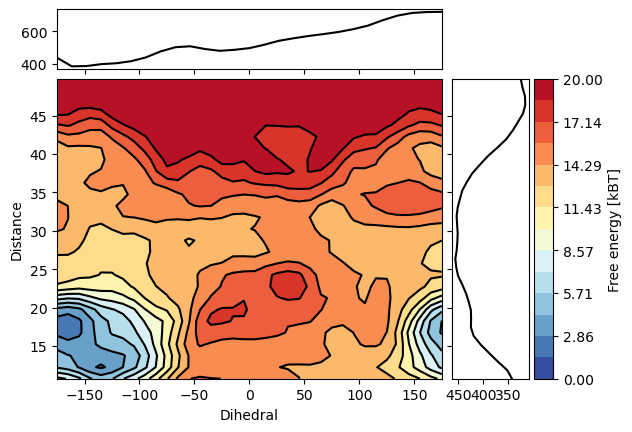

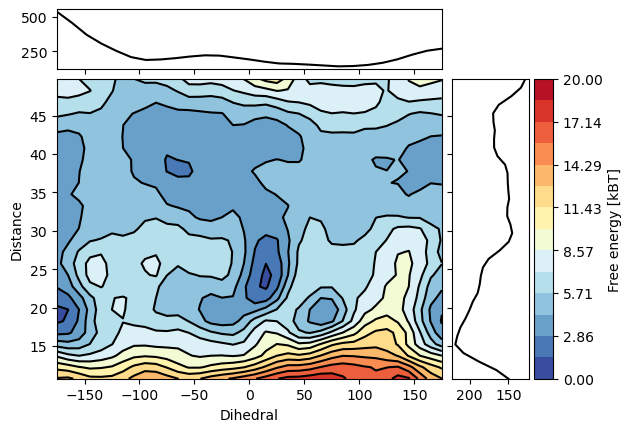

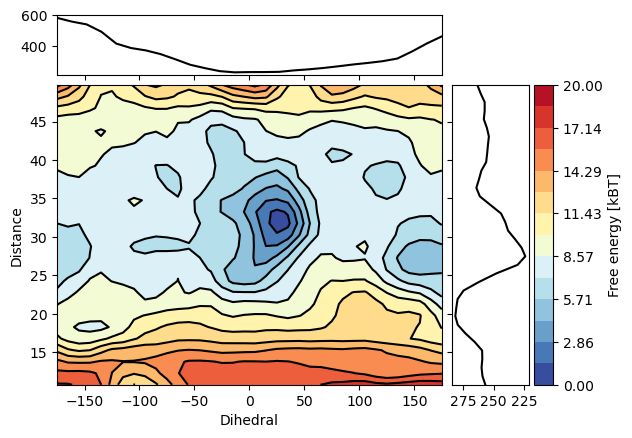

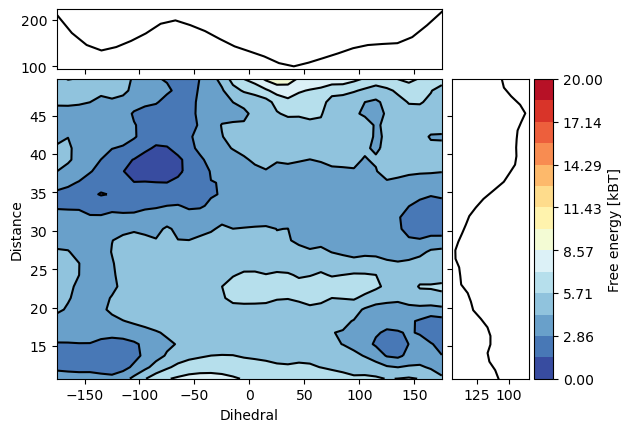

In [6]:
# Assuming plot_smoothed_energy_contour is defined as provided earlier

# Process and plot PMF data for the first dataset
X_2D1, Y_2D1, Z_energy_2D1 = process_pmf_data_adjusted(pmf_data1)
plot_smoothed_energy_contour(X_2D1, Y_2D1, Z_energy_2D1, sigma=0.75)

# Process and plot PMF data for the second dataset
X_2D2, Y_2D2, Z_energy_2D2 = process_pmf_data_adjusted(pmf_data2)
plot_smoothed_energy_contour(X_2D2, Y_2D2, Z_energy_2D2, sigma=0.75)

# Process and plot PMF data for the third dataset
X_2D3, Y_2D3, Z_energy_2D3 = process_pmf_data_adjusted(pmf_data3)
plot_smoothed_energy_contour(X_2D3, Y_2D3, Z_energy_2D3, sigma=0.75)

# Process and plot PMF data for the fourth dataset
X_2D4, Y_2D4, Z_energy_2D4 = process_pmf_data_adjusted(pmf_data4)
plot_smoothed_energy_contour(X_2D4, Y_2D4, Z_energy_2D4, sigma=0.75)


In [7]:
pmf_data_nmr = np.loadtxt('nmr_combined_file.txt')
dihedrals_nmr = pmf_data_nmr[:,0]
distances_nmr = pmf_data_nmr[:,1]
energy_nmr = pmf_data_nmr[:,2]
np.shape(energy_nmr)

(191,)

In [8]:
X_nmr = -dihedrals_nmr #Because our dihedrals are opposite
Y_nmr = distances_nmr
Z_energy_nmr = energy_nmr

In [9]:
# Assume X_nmr, Y_nmr, and Z_energy_nmr are numpy arrays with 30 elements each
# First, check if we really have 30 elements in each
len = len(X_nmr)

# Now, create 2D arrays by repeating the 1D arrays
X_2D_nmr = np.tile(X_nmr, (len, 1))  # Repeat X_nmr for each row
Y_2D_nmr = np.tile(Y_nmr.reshape(len, 1), (1, len))  # Repeat Y_nmr for each column

# If Z_energy_nmr is supposed to vary along with X_nmr (or similarly with Y_nmr)
# We need to decide how to fill in the 2D grid. One simple approach is to assume
# Z values are the same along one axis, then you could use np.tile again, like this:
Z_energy_2D_nmr = np.tile(Z_energy_nmr, (len, 1))  # If Z varies along with X
# or
Z_energy_2D_nmr = np.tile(Z_energy_nmr.reshape(len, 1), (1, len)) 

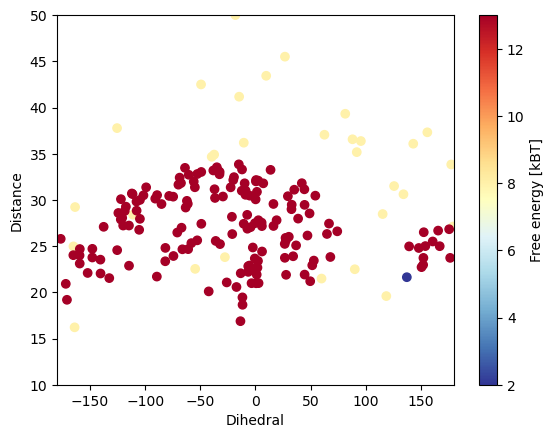

In [10]:
# Normalize the energy values for color mapping
norm = Normalize(vmin=np.min(Z_energy_2D_nmr), vmax=np.max(Z_energy_2D_nmr))

# Plotting
fig, ax = plt.subplots()

# Scatter plot for the 30 data points
scatter = ax.scatter(X_nmr, Y_nmr, c=Z_energy_nmr, cmap='RdYlBu_r', norm=norm)

# Set the ranges for the axes according to the specified limits
ax.set_xlim(-180, 180)  # Dihedral range
ax.set_ylim(10, 50)     # Distance range

# Add a colorbar with label
plt.colorbar(scatter, label='Free energy [kBT]')

# Set axis labels
ax.set_xlabel('Dihedral')
ax.set_ylabel('Distance')

# Show the plot
plt.show()